# Wine Quality Prediction

### For Red Wine Dataset

### Algorithm used: Decision Trees

Dataset source: https://archive.ics.uci.edu/ml/datasets/wine+quality

This jupyter notebook is a part of the blog https://mldoodles.com/wine-quality-prediction/

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Import the dataset

In [2]:
data_red = pd.read_csv("winequality-red.csv", sep=";")

In [3]:
data_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
print("There are {} rows and {} columns".format(data_red.shape[0], data_red.shape[1]))

There are 1599 rows and 12 columns


### Check for null values

In [5]:
data_red.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

### Plot Histogram - To see how much data in each quality

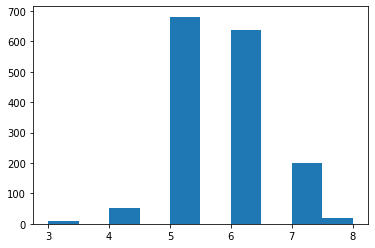

In [6]:
plt.hist(data_red["quality"])
plt.show()

In [7]:
data_red["quality"].groupby(data_red["quality"]).count()

quality
3     10
4     53
5    681
6    638
7    199
8     18
Name: quality, dtype: int64

### Analyze correlation using heatmap

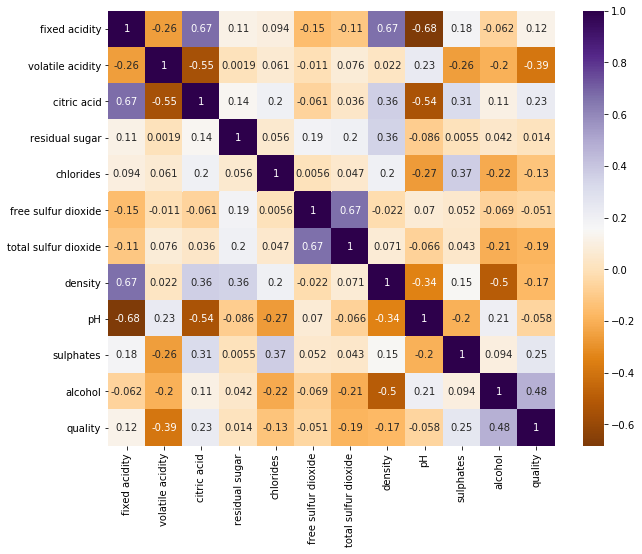

In [8]:
plt.figure(figsize=(10,8))
sns.heatmap(data_red.corr(), annot=True, cmap="PuOr")
plt.show()

### Split data into two categories

Add a new column "good_quality" and number it as 0 or 1.

Quality 1 to 6 => "good_quality":0

Quality 7 to 10 => "good_quality":1

In [9]:
data_red["good_quality"] = [0 if i<7 else 1 for i in data_red["quality"]]

In [10]:
data_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,good_quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


In [11]:
data_red["good_quality"].groupby(data_red["good_quality"]).count()

good_quality
0    1382
1     217
Name: good_quality, dtype: int64

### Split features and label

In [12]:
y = data_red["good_quality"]
X = data_red.drop(["good_quality", "quality"], axis=1)

### Normalize the features

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

### Split training set and testing set

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=0)

In [15]:
print("Number of samples in training set:", X_train.shape[0])
print("Number of samples in testing set:", X_test.shape[0])

Number of samples in training set: 1199
Number of samples in testing set: 400


### Model building

In [16]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=0)

### Model Fitting

In [17]:
model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

### Model Prediction

In [18]:
y_pred = model.predict(X_test)

### Calculate score

In [19]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred, y_test)
print("Accuracy", score)

Accuracy 0.9075


### View the results

In [20]:
results_series = {"actual":y_test, "predicted":y_pred}
results = pd.DataFrame(results_series)
print("*** First 5 rows of results ***")
results.head()

*** First 5 rows of results ***


,actual,predicted
1109,0,0
1032,0,0
1002,1,1
487,0,0
979,0,0


### Analyze feature importances

In [21]:
s = {'col1':X.columns, 'col2':model.feature_importances_}
df = pd.DataFrame(s)
df_sorted = df.sort_values('col2')

In [22]:
df

,col1,col2
0,fixed acidity,0.040200
1,volatile acidity,0.136641
2,citric acid,0.032425
3,residual sugar,0.093906
4,chlorides,0.086487
5,free sulfur dioxide,0.084754
6,total sulfur dioxide,0.046688
7,density,0.039731
8,pH,0.072679
9,sulphates,0.144827


In [23]:
df_sorted

,col1,col2
2,citric acid,0.032425
7,density,0.039731
0,fixed acidity,0.040200
6,total sulfur dioxide,0.046688
8,pH,0.072679
5,free sulfur dioxide,0.084754
4,chlorides,0.086487
3,residual sugar,0.093906
1,volatile acidity,0.136641
9,sulphates,0.144827


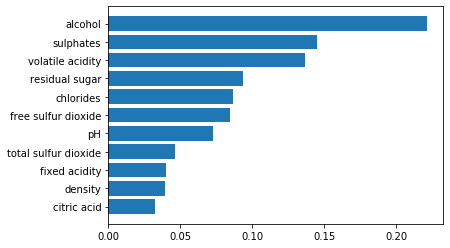

In [24]:
plt.barh(df_sorted["col1"], df_sorted["col2"])
plt.show()